## W266 Transfer learning Project by Arunima Kayath, Anamika Sinha

In [23]:
import pandas as pd
import gzip
import time
# Install a few python packages using pip
from common import utils
utils.require_package('nltk')
utils.require_package("wget")      # for fetching dataset
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# Standard python helper libraries.
from __future__ import print_function
from __future__ import division
import os, sys, time
import collections
import itertools

# Numerical manipulation libraries.
import numpy as np
from scipy import stats, optimize

import nltk
nltk.download('punkt')
from nltk import word_tokenize

# Helper libraries
from common import utils, vocabulary
#import segment

[nltk_data] Downloading package punkt to
[nltk_data]     /home/reachanamikasinha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#Function to read the amazon review data files
def parse(path):
  print('start parse')
  start_parse = time.time()
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)
  end_parse = time.time()
  print('end parse with time for parse',end_parse - start_parse)

def getDF(path):
  print('start getDF')
  start = time.time()
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  print('end getDF')
  end = time.time()
  print('time taken to load data = ',end-start)
  return pd.DataFrame.from_dict(df, orient='index')
#df = getDF('reviews_Toys_and_Games.json.gz') #old def function corresponding to the step bt step vectorization

In [4]:
df_vid = getDF('reviews_Video_Games.json.gz')
df_toys = getDF('reviews_Toys_and_Games.json.gz')

start getDF
start parse
end parse with time for parse 70.47900295257568
end getDF
time taken to load data =  70.47920227050781
start getDF
start parse
end parse with time for parse 108.89086604118347
end getDF
time taken to load data =  108.89126324653625


In [5]:
df_aut = getDF('reviews_Automotive.json.gz')

start getDF
start parse
end parse with time for parse 68.20063710212708
end getDF
time taken to load data =  68.20132255554199


In [6]:
df_hnk = getDF('reviews_Home_and_Kitchen.json.gz')

start getDF
start parse
end parse with time for parse 232.12740516662598
end getDF
time taken to load data =  232.1281054019928


In [10]:
#Looking at a few exampls of the data.
print('\n Toys reviews summary')
print(df_toys.shape)
print(df_toys.columns)
print(df_toys.head(3))
print('\n Video games reviews summary')
print(df_vid.shape)
print(df_vid.columns)
print(df_vid.head(3))
print('\n Auto reviews summary')
print(df_aut.shape)
print(df_aut.columns)
print(df_aut.head(3))
print('\n Home and Kitchen reviews summary')
print(df_hnk.shape)
print(df_hnk.columns)
print(df_hnk.head(3))


 Toys reviews summary
(2252771, 9)
Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')
       reviewerID        asin   reviewerName helpful  \
0   AMEVO2LY6VEJA  0000191639  Nicole Soeder  [0, 0]   
1  A3C9CSW3TJITGT  0005069491          Renee  [0, 0]   
2  A31POTIYCKSZ9G  0076561046  So CA Teacher  [0, 0]   

                                          reviewText  overall  \
0  Great product, thank you! Our son loved the pu...      5.0   
1  I love these felt nursery rhyme characters and...      4.0   
2  I see no directions for its use. Therefore I h...      3.0   

                                      summary  unixReviewTime   reviewTime  
0                                     Puzzles      1388016000  12 26, 2013  
1  Charming characters but busy work required      1377561600  08 27, 2013  
2                    No directions for use...      1404864000   07 9, 2014  

 Video games re

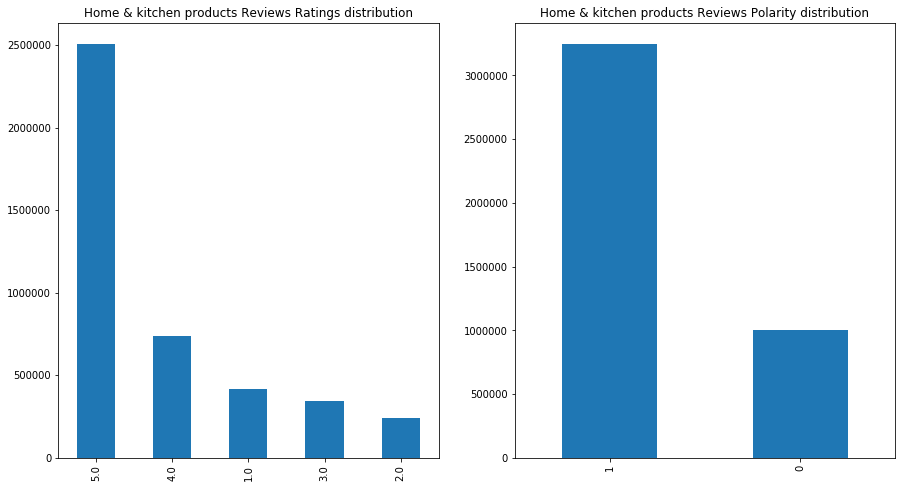

In [79]:
import matplotlib.gridspec as gridspec
fig1, axs = plt.subplots(figsize=[15,8], ncols=2)
ax1, ax2 = axs
# ax1 = fig1.add_subplot(gs[:,0:50])
# ax2 = fig1.add_subplot(gs[:,51:100])


# Convert 5 types ratings into 2 (negative or positive with value 0 and 1 respectively)
df_hnk["polarity"] = np.where(df_hnk['overall'] > 3, 1, 0)

#print(df_hnk.tail())

df_hnk['overall'].value_counts().plot(kind='bar',title ='Home & kitchen products Reviews Ratings distribution',  ax=ax1)

df_hnk['polarity'].value_counts().plot(kind='bar',title='Home & kitchen products Reviews Polarity distribution',  ax=ax2)

plt.show()

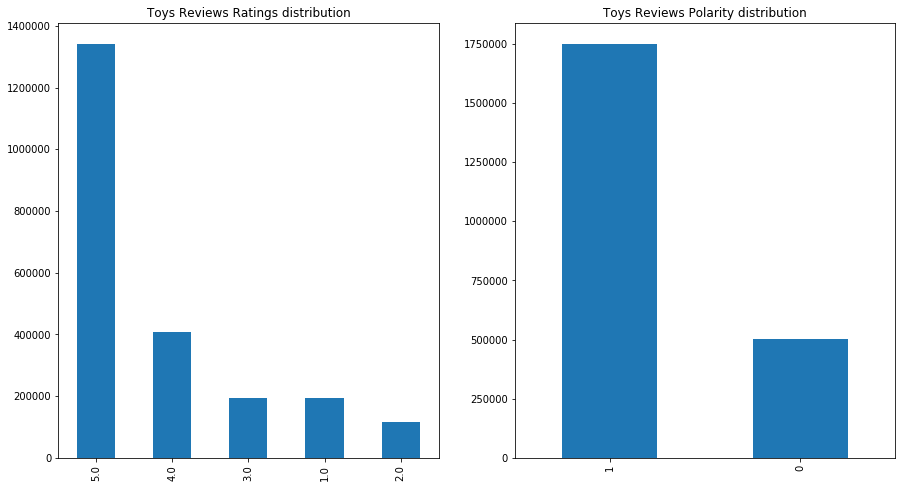

In [83]:
#Looking at distribution of Ratings for toys

fig1, axs = plt.subplots(figsize=[15,8], ncols=2)
ax1, ax2 = axs


# Convert 5 types ratings into 2 (negative or positive with value 0 and 1 respectively)
df_toys["polarity"] = np.where(df_toys['overall'] > 3, 1, 0)

#print(df_hnk.tail())

df_toys['overall'].value_counts().plot(kind='bar',title ='Toys Reviews Ratings distribution',  ax=ax1)

df_toys['polarity'].value_counts().plot(kind='bar',title='Toys Reviews Polarity distribution',  ax=ax2)

plt.show()

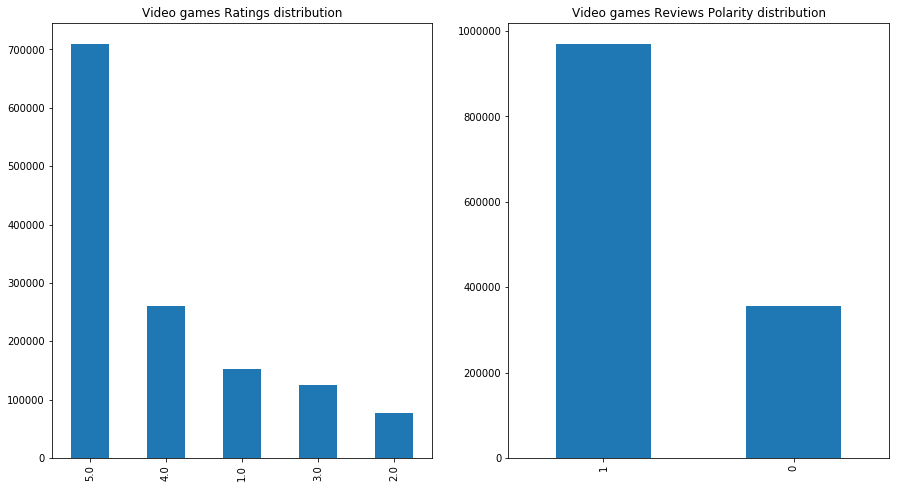

In [84]:
#Looking at distribution of Ratings for video games

fig1, axs = plt.subplots(figsize=[15,8], ncols=2)
ax1, ax2 = axs


# Convert 5 types ratings into 2 (negative or positive with value 0 and 1 respectively)
df_vid["polarity"] = np.where(df_vid['overall'] > 3, 1, 0)

#print(df_hnk.tail())

df_vid['overall'].value_counts().plot(kind='bar',title ='Video games Ratings distribution',  ax=ax1)

df_vid['polarity'].value_counts().plot(kind='bar',title='Video games Reviews Polarity distribution',  ax=ax2)

plt.show()

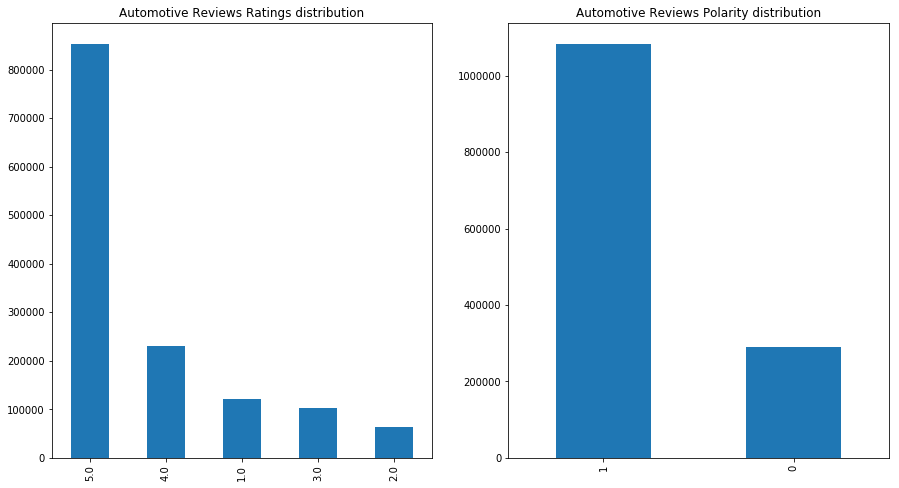

In [82]:
#Looking at distribution of Ratings for Automotive products

fig1, axs = plt.subplots(figsize=[15,8], ncols=2)
ax1, ax2 = axs


# Convert 5 types ratings into 2 (negative or positive with value 0 and 1 respectively)
df_aut["polarity"] = np.where(df_aut['overall'] > 3, 1, 0)

#print(df_hnk.tail())

df_aut['overall'].value_counts().plot(kind='bar',title ='Automotive Reviews Ratings distribution',  ax=ax1)

df_aut['polarity'].value_counts().plot(kind='bar',title='Automotive Reviews Polarity distribution',  ax=ax2)

plt.show()

### We see the heavy  positive skew in all four datasets with only about 20-30% of the polarity as negative. So the datasets are  highly imbalanced

In [91]:
#checking for null values
df_toys.isnull().sum()

#Only reviewerName has 11847 null values.Since this field is not being used in the analysis we 
#leave these rows in the dataframe

df_vid.isnull().sum()
#Only reviewerName has 26185 null values.Since this field is not being used in the analysis we 
#leave these rows in the dataframe

df_aut.isnull().sum()
#Only reviewerName has 8437 null values.Since this field is not being used in the analysis we 
#leave these rows in the dataframe

df_hnk.isnull().sum()
#Only reviewerName has 33202 null values.Since this field is not being used in the analysis we 
#leave these rows in the dataframe

reviewerID            0
asin                  0
reviewerName      33202
helpful               0
reviewText            0
overall               0
summary               0
unixReviewTime        0
reviewTime            0
polarity              0
dtype: int64

In [11]:
#Looking at a few examples of review text
print('Toys reviews examples\n')
for i in range(3):
    print(df_toys['reviewerID'].iloc[i])
    print(df_toys['reviewText'].iloc[i])

print('\n Video games reviews examples\n')
for i in range(3):
    print(df_vid['reviewerID'].iloc[i])
    print(df_vid['reviewText'].iloc[i])
    
print('\n Automobile reviews examples\n')
for i in range(3):
    print(df_aut['reviewerID'].iloc[i])
    print(df_aut['reviewText'].iloc[i])
    
print('\n Home and Kitchen reviews examples\n')
for i in range(3):
    print(df_hnk['reviewerID'].iloc[i])
    print(df_hnk['reviewText'].iloc[i])

Toys reviews examples

AMEVO2LY6VEJA
Great product, thank you! Our son loved the puzzles.  They have large pieces yet they are still challenging for a 4 year old.
A3C9CSW3TJITGT
I love these felt nursery rhyme characters and scenes.  The quality of the felt is good, and the illustrations are detailed and pretty.  As noted, the figures and scenes are printed on 2 large sheets of flannel and each individual item needs to be cut out.  This process took me 2 hours of tiny cutting.  To me it does not lend itself to a book form but rather laying out the scenes separately or for use on a flannel board.  However, I love the quiet play it offers for my toddler, and as a former Kindergarten teacher, I understand the value of learning rhyme and its connection to future reading.  Overall, delightful product with some work involved.
A31POTIYCKSZ9G
I see no directions for its use. Therefore I have to make up the games, unfortunately.

 Video games reviews examples

AB9S9279OZ3QO
I haven't gotten aro

In [59]:
#Get the count by unique product id, and % of products and reviews left if we limit to products with at least X reviews
def product_skew(df):
    tempcnt = df.groupby('asin').size().reset_index()
    cnt_total = tempcnt.count()[1]
    sum_total = tempcnt.iloc[:,1].sum()
    cnt_5 = tempcnt[tempcnt.iloc[:,1] > 5].count()[1]
    sum_5 = tempcnt[tempcnt.iloc[:,1] > 5].sum()[1]
    cnt_20 = tempcnt[tempcnt.iloc[:,1] > 20].count()[1]
    sum_20 = tempcnt[tempcnt.iloc[:,1] > 20].sum()[1]
    print('Total','\n\tCount of unique products:',cnt_total,'\n\tSum of their reviews',sum_total)
    print('Total with at least 5 reviews','\n\tCount of unique products:',cnt_5,'Percentage of total {0:.0f}%'.format(cnt_5*100/cnt_total))
    print('\tSum of their reviews',sum_5,'Percentage of total {0:.0f}%'.format(sum_5*100/sum_total))
    print('Total with at least 20 reviews','\n\tCount of unique products:',cnt_20,'Percentage of total {0:.0f}%'.format(cnt_20*100/cnt_total))
    print('\tSum of their reviews',sum_20,'Percentage of total {0:.0f}%'.format(sum_20*100/sum_total))
    return

print('Additional Summary metrics for Toy reviews')
product_skew(df_toys)

print('\nAdditional Summary metrics for Video Games reviews')
product_skew(df_vid)

print('\nAdditional Summary metrics for Auto reviews')
product_skew(df_aut)

print('\nAdditional Summary metrics for Home and Kitchen reviews')
product_skew(df_hnk)


Additional Summary metrics for Toy reviews
Total 
	Count of unique products: 327698 
	Sum of their reviews 2252771
Total with at least 5 reviews 
	Count of unique products: 68782 Percentage of total 21%
	Sum of their reviews 1775109 Percentage of total 79%
Total with at least 20 reviews 
	Count of unique products: 19992 Percentage of total 6%
	Sum of their reviews 1275698 Percentage of total 57%

Additional Summary metrics for Video Games reviews
Total 
	Count of unique products: 50210 
	Sum of their reviews 1324753
Total with at least 5 reviews 
	Count of unique products: 23866 Percentage of total 48%
	Sum of their reviews 1266698 Percentage of total 96%
Total with at least 20 reviews 
	Count of unique products: 10904 Percentage of total 22%
	Sum of their reviews 1124236 Percentage of total 85%

Additional Summary metrics for Auto reviews
Total 
	Count of unique products: 320112 
	Sum of their reviews 1373768
Total with at least 5 reviews 
	Count of unique products: 42052 Percentage o

In [8]:
#Create train,dev,test split
from sklearn.model_selection import train_test_split
train_toys,devtest = train_test_split(df_toys, test_size=0.4, random_state=42)
dev_toys,test_toys = train_test_split(devtest,test_size = 0.5,random_state=42)
print('Toy reviews train, dev and test set dataframe shape:',train_toys.shape,dev_toys.shape,test_toys.shape)

#For Video games reviews
train_vid,devtest = train_test_split(df_vid, test_size=0.4, random_state=42)
dev_vid,test_vid = train_test_split(devtest,test_size = 0.5, random_state=42)
print('Video games reviews train, dev and test set dataframe shape:',train_vid.shape,dev_vid.shape,test_vid.shape)

#For Auto reviews
train_aut,devtest = train_test_split(df_aut, test_size=0.4, random_state=42)
dev_aut,test_aut = train_test_split(devtest,test_size = 0.5, random_state=42)
print('Auto reviews train, dev and test set dataframe shape:',train_aut.shape,dev_aut.shape,test_aut.shape)

#For Home and Kitchen reviews
train_hnk,devtest = train_test_split(df_hnk, test_size=0.4, random_state=42)
dev_hnk,test_hnk = train_test_split(devtest,test_size = 0.5, random_state=42)
print('Home and Kitchen reviews train, dev and test set dataframe shape:',train_hnk.shape,dev_hnk.shape,test_hnk.shape)

Toy reviews train, dev and test set dataframe shape: (1351662, 9) (450554, 9) (450555, 9)
Video games reviews train, dev and test set dataframe shape: (794851, 9) (264951, 9) (264951, 9)
Auto reviews train, dev and test set dataframe shape: (824260, 9) (274754, 9) (274754, 9)
Home and Kitchen reviews train, dev and test set dataframe shape: (2552355, 9) (850785, 9) (850786, 9)


In [9]:
#Function to create a smaller sized train and dev data set. Enables testing accuracy for different sizes.
#Also binarizes the labels. Ratings of 1,2 and to 0; Ratings of 4,5 to 1.

def set_df_size(size,data_train,data_dev):
    size_train = size
    len_max_train = data_train[data_train.overall!=3].shape[0] #max possible length of train data set taking out the 3 ratings.
    print("Number of reviews with ratings != 3 in train set",len_max_train)
    temp_size_train = min(len_max_train,size_train)

    len_max_dev = data_dev[data_dev.overall!=3].shape[0]
    print("Number of reviews with ratings != 3 in dev set",len_max_dev)
    temp_size_dev = min(len_max_dev,int(0.3*temp_size_train)) #making the dev set about 0.3 times the train set.

    temp_train_data = data_train[data_train.overall != 3][:temp_size_train]
    print('Size of train data',temp_train_data.shape)
    #print(temp_train_data.groupby('overall').count())
    #print(temp_train_toys[:5])

    temp_dev_data = data_dev[data_dev.overall!=3][:temp_size_dev]
    print('Size of dev data',temp_dev_data.shape)
    #print(temp_dev_data.groupby('overall').count())
    #print(temp_dev_data[:2])
    
    #Binarize ratings
    temp_train_y = np.zeros(temp_size_train)
    temp_train_y[temp_train_data.overall > 3] = 1
    temp_dev_y = np.zeros(temp_size_dev)
    temp_dev_y[temp_dev_data.overall>3] = 1
    print('binarized y shape',temp_train_y.shape,temp_dev_y.shape)
    #print(temp_dev_y[:20],data_dev.overall[:20])
    return temp_train_data,temp_dev_data,temp_train_y,temp_dev_y

In [10]:
list_df = ['toys','vid','aut','hnk'] #list of keys that refer to each dataframe. Adding a new dataframe would require updating this list

size_train = 100000 #Set size of train set here. This is a hyperparameter.

dict_train_df = {} #Dict to store train input data frame for each domain, can be accessed by using domain name as key
dict_dev_df = {} #Dict to store dev input data frame for each domain, can be accessed by using domain name as key
dict_train_y = {} #Dict to store binarized train data label for each domain
dict_dev_y = {} #Dict to store binarized dev data label for each domain
key = list_df[0]
print('Toys reviews\n')
dict_train_df[key], dict_dev_df[key], dict_train_y[key], dict_dev_y[key] = set_df_size(size_train,train_toys,dev_toys)
print('\n Video games reviews\n')
key = list_df[1]
dict_train_df[key], dict_dev_df[key], dict_train_y[key], dict_dev_y[key] = set_df_size(size_train,train_vid,dev_vid)
print('\n Auto reviews\n')
key = list_df[2]
dict_train_df[key], dict_dev_df[key], dict_train_y[key], dict_dev_y[key] = set_df_size(size_train,train_aut,dev_aut)
print('\n Home and Kitchen reviews\n')
key = list_df[3]
dict_train_df[key], dict_dev_df[key], dict_train_y[key], dict_dev_y[key] = set_df_size(size_train,train_hnk,dev_hnk)

Toys reviews

Number of reviews with ratings != 3 in train set 1235443
Number of reviews with ratings != 3 in dev set 411860
Size of train data (100000, 9)
Size of dev data (30000, 9)
binarized y shape (100000,) (30000,)

 Video games reviews

Number of reviews with ratings != 3 in train set 720397
Number of reviews with ratings != 3 in dev set 240040
Size of train data (100000, 9)
Size of dev data (30000, 9)
binarized y shape (100000,) (30000,)

 Auto reviews

Number of reviews with ratings != 3 in train set 761859
Number of reviews with ratings != 3 in dev set 254068
Size of train data (100000, 9)
Size of dev data (30000, 9)
binarized y shape (100000,) (30000,)

 Home and Kitchen reviews

Number of reviews with ratings != 3 in train set 2345113
Number of reviews with ratings != 3 in dev set 781758
Size of train data (100000, 9)
Size of dev data (30000, 9)
binarized y shape (100000,) (30000,)


In [145]:
#Converting reviews to sparse matrix of word ids with count vectorizer, and using Naive Bayes to make the prediction.
#This section also creates the count_vectorizer and Naive Bayes models for each domain to be used to test transfer learning

from sklearn.naive_bayes import MultinomialNB
dict_vectorizers = {} #Dict to store the count_vectorizer model developed on each domain
dict_train_ids = {} #Dict to store train data reviews as sparse matrix of word ids
dict_dev_ids = {} #Dict to store dev data reviews as sparse matrix of word ids
dict_nb = {} #Dict to store naive bayes model developed on each domain. Assumes input features are developed using the corresponding count_vectorizer
dict_dev_ypred = {} #Dict to store dev predictions
for key in list_df:
    
    #Converting ratings to tokenized word id counts as a sparse matrix using count_vectorizer
    dict_vectorizers[key] = CountVectorizer()
    dict_train_ids[key] = dict_vectorizers[key].fit_transform(dict_train_df[key].reviewText)
    dict_dev_ids[key] = dict_vectorizers[key].transform(dict_dev_df[key].reviewText)
    print("Number words in training corpus for",key,len(dict_vectorizers[key].get_feature_names()))
    print(key,'dataset id shapes',dict_train_ids[key].shape, dict_dev_ids[key].shape)
    
    #Building a Naive Bayes model to predict the ratings
    dict_nb[key] = MultinomialNB()
    dict_nb[key].fit(dict_train_ids[key],dict_train_y[key])
    dict_dev_ypred[key] = dict_nb[key].predict(dict_dev_ids[key])
    acc = accuracy_score(dict_dev_y[key], dict_dev_ypred[key])
    print("Accuracy on",key,"dev set for binary prediction with toys naive bayes model: {:.02%}".format(acc))
    print('Corresponding classification report\n',classification_report(dict_dev_y[key], dict_dev_ypred[key]))

Number words in training corpus for toys 63647
toys dataset id shapes (100000, 63647) (30000, 63647)
Accuracy on toys dev set for binary prediction with toys naive bayes model: 92.36%
Corresponding classification report
              precision    recall  f1-score   support

        0.0       0.74      0.75      0.74      4447
        1.0       0.96      0.95      0.96     25553

avg / total       0.92      0.92      0.92     30000

Number words in training corpus for vid 99720
vid dataset id shapes (100000, 99720) (30000, 99720)
Accuracy on vid dev set for binary prediction with toys naive bayes model: 88.77%
Corresponding classification report
              precision    recall  f1-score   support

        0.0       0.70      0.71      0.71      5721
        1.0       0.93      0.93      0.93     24279

avg / total       0.89      0.89      0.89     30000

Number words in training corpus for aut 59476
aut dataset id shapes (100000, 59476) (30000, 59476)
Accuracy on aut dev set for bina

In [143]:
#Accuracy of transfer learning

dict_transfer_ids = {} #Dictionary to store the dev vector ids for dataframe A(df) using the count_vectorizer of dataframe B(vect)
transfer_results = pd.DataFrame(index=list_df,columns=list_df) #Dataframe to store accuracy on transfer. Col = Model, row = dataframe
for vectKey in list_df:
    dict_transfer_ids[vectKey] = {}
    #print('vectKey',vectKey)
    for dfKey in list_df:
        #print('dfKey',dfKey)
        dict_transfer_ids[vectKey][dfKey] = dict_vectorizers[vectKey].transform(dict_dev_df[dfKey].reviewText)
        #print(dfKey,'dataset using ',vectKey,' count vectorizer, id shapes',dict_transfer_ids[vectKey][dfKey].shape)
        dict_dev_ypred = dict_nb[vectKey].predict(dict_transfer_ids[vectKey][dfKey])
        acc = accuracy_score(dict_dev_y[dfKey], dict_dev_ypred)
        #print("Accuracy on ",dfKey," dev set for binary prediction with ", vectKey," naive bayes model: {:.02%}".format(acc))
        transfer_results[vectKey][dfKey] = acc

print("Effectiveness of transfer learning with Naive Bayes:")
print("Accuracy of rating predictions")
print("Colums = source domain, Rows = target domain\n")
print(transfer_results.to_string(float_format = '{:.01%}'.format))

Effectiveness of transfer learning with Naive Bayes:
Accuracy of rating predictions
Colums = source domain, Rows = target domain

      toys   vid   aut   hnk
toys 92.4% 91.3% 91.0% 91.1%
vid  86.1% 88.8% 87.3% 86.7%
aut  74.4% 79.3% 91.7% 83.4%
hnk  85.7% 86.4% 91.2% 91.3%


In [144]:
#Calculating and displaying as transfer loss
transfer_loss = pd.DataFrame(index=list_df,columns=list_df) #Dataframe to store loss in accuracy on transfer. Col = Model, row = dataframe
for A in list_df:
    for B in list_df:
        transfer_loss[A][B] = transfer_results[B][B] - transfer_results[A][B]
print("Transfer loss on rating predictions")
print("Colums = source domain, Rows = target domain\n")
print(transfer_loss.to_string(float_format = '{:.01%}'.format))

Transfer loss on rating predictions
Colums = source domain, Rows = target domain

      toys   vid  aut  hnk
toys  0.0%  1.1% 1.4% 1.3%
vid   2.7%  0.0% 1.4% 2.1%
aut  17.3% 12.4% 0.0% 8.3%
hnk   5.6%  4.9% 0.1% 0.0%


### Keeping track of results from test runs
With number in train set = 10000 (excl 3 ratings)    
    Accuracy on dev set for binary prediction: 88.74%
    Accuracy on dev set for 4 level (1,2,4,5) prediction: 67.16%
    Vocab Size : 38696
    
With number in train set = 50000 (excl 3 ratings)   
    Accuracy on dev set for binary prediction: 91.33%   
    Accuracy on dev set for 4 level (1,2,4,5) prediction: 69.33% 
    Vocab Size : ~ ..
    
With number in train set = 100000 (excl 3 ratings)
    Accuracy on dev set for binary prediction: 91.56%   
    Accuracy on dev set for 4 level (1,2,4,5) prediction: 70.42%
    Vocab Size : 105304

With number in train set = 500000, dev set = 150000 (excl 3 ratings)    
    Accuracy on dev set for binary prediction: 91.73%
    Accuracy on dev set for 4 level (1,2,4,5) prediction: 70.95%
    vocab size 307822
    
With number in train set = 1200000, dev set = 360000 (excl 3 ratings)    
    Accuracy on dev set for binary prediction: 91.92%
    Accuracy on dev set for 4 level (1,2,4,5) prediction: 71.24%
    vocab size 674074 (not repeated with correction for vocab)
    
### Output from trying different pre-processing with the toys review set.
 
 Accuracy on dev set for binary prediction: 91.69%
classification report naive bayes binary classification 
              precision    recall  f1-score   support

        0.0       0.70      0.77      0.74     22472
        1.0       0.96      0.94      0.95    127528

avg / total       0.92      0.92      0.92    150000

Accuracy on dev set for binary prediction with count vectorizer: 91.92%
classification report naive bayes binary classification with count vectorizer 
              precision    recall  f1-score   support

        0.0       0.71      0.79      0.75     22472
        1.0       0.96      0.94      0.95    127528

avg / total       0.92      0.92      0.92    150000

Accuracy on dev set for binary prediction with tfidf: 90.13%
classification report naive bayes binary classification with tfidf 
              precision    recall  f1-score   support

        0.0       0.90      0.38      0.54     22472
        1.0       0.90      0.99      0.94    127528

avg / total       0.90      0.90      0.88    150000

Accuracy on dev set for 4 level (1,2,4,5) prediction: 70.91%
classification report naive bayes multinomial classification with tfidf 
              precision    recall  f1-score   support

          1       0.60      0.74      0.66     13975
          2       0.32      0.05      0.09      8497
          4       0.42      0.34      0.37     29733
          5       0.80      0.87      0.83     97795

avg / total       0.68      0.71      0.68    150000

### Output from simple ratings prediction with video games review set.

train set size : 10000, dev set size : 3000
Accuracy on dev set for binary prediction with count vectorizer: 88.93%
classification report naive bayes binary classification with count vectorizer 
              precision    recall  f1-score   support

        0.0       0.77      0.54      0.64       534
        1.0       0.91      0.96      0.93      2466

avg / total       0.88      0.89      0.88      3000

Accuracy on dev set for binary prediction with tfidf: 84.93%
classification report naive bayes binary classification with tfidf 
              precision    recall  f1-score   support

        0.0       0.95      0.16      0.28       534
        1.0       0.85      1.00      0.92      2466

avg / total       0.86      0.85      0.80      3000

Using SVM, with Count Vectorizer pre-processing:
Accuracy on dev set for binary prediction: 82.20%
classification report svm              precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       534
        1.0       0.82      1.00      0.90      2466

avg / total       0.68      0.82      0.74      3000

time taken for SVM 48.42102265357971

Using SVM with TFIDF pre-processing:
Accuracy on dev set for binary prediction: 82.20%
classification report svm              precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       534
        1.0       0.82      1.00      0.90      2466

avg / total       0.68      0.82      0.74      3000

train set size : 100000, dev set size : 30000
Accuracy on dev set for binary prediction with count vectorizer: 89.12%
classification report naive bayes binary classification with count vectorizer 
              precision    recall  f1-score   support

        0.0       0.72      0.71      0.71      5728
        1.0       0.93      0.93      0.93     24272

avg / total       0.89      0.89      0.89     30000

Accuracy on dev set for binary prediction with tfidf: 86.04%
classification report naive bayes binary classification with tfidf 
              precision    recall  f1-score   support

        0.0       0.91      0.30      0.45      5728
        1.0       0.86      0.99      0.92     24272

avg / total       0.87      0.86      0.83     30000



### Results for transfer learning from toys to video games
number words in training corpus for toys: 63984
toys dataset id shapes (100000, 63984) (30000, 63984)
number words in training corpus for video games: 98899
videos dataset id shapes (100000, 98899) (30000, 98899)
number words in training corpus for automobiles: 59468
automobile dataset id shapes (100000, 59468) (30000, 59468)
number words in training corpus for home and kitchen: 57884
home and kitchen dataset id shapes (100000, 57884) (30000, 57884)

Accuracy on toys dev set for binary prediction with toys naive bayes model: 92.23%   
Corresponding classification report              precision    recall  f1-score   support

        0.0       0.74      0.74      0.74      4503
        1.0       0.95      0.95      0.95     25497

avg / total       0.92      0.92      0.92     30000

Accuracy on video games dev set for binary prediction with video games naive bayes model: 89.16%   
Corresponding classification report              precision    recall  f1-score   support

        0.0       0.72      0.71      0.71      5725
        1.0       0.93      0.93      0.93     24275

avg / total       0.89      0.89      0.89     30000

Accuracy on autos dev set for binary prediction with autos naive bayes model: 91.93%   
Corresponding classification report              precision    recall  f1-score   support

        0.0       0.78      0.61      0.69      4323
        1.0       0.94      0.97      0.95     25677

avg / total       0.91      0.92      0.92     30000

Accuracy on home and kitchen dev set for binary prediction with home and kitchen naive bayes model: 91.37%   
Corresponding classification report              precision    recall  f1-score   support

        0.0       0.76      0.71      0.73      5072
        1.0       0.94      0.96      0.95     24928

avg / total       0.91      0.91      0.91     30000

### Transfer learning:

Accuracy on video games dev set for binary prediction with toys naive bayes model: 86.99%   
Corresponding classification report              precision    recall  f1-score   support

        0.0       0.66      0.65      0.66      5725
        1.0       0.92      0.92      0.92     24275

avg / total       0.87      0.87      0.87     30000

Accuracy on automobiles dev set for binary prediction with toys naive bayes model: 76.06%   
Corresponding classification report              precision    recall  f1-score   support

        0.0       0.36      0.88      0.51      4323
        1.0       0.97      0.74      0.84     25677

avg / total       0.88      0.76      0.79     30000

Accuracy on home and kitchen dev set for binary prediction with toys naive bayes model: 85.78%   
Corresponding classification report              precision    recall  f1-score   support

        0.0       0.55      0.85      0.67      5072
        1.0       0.97      0.86      0.91     24928

avg / total       0.90      0.86      0.87     30000

Accuracy on toys dev set for binary prediction with video games naive bayes model: 91.53%   
Corresponding classification report              precision    recall  f1-score   support

        0.0       0.76      0.63      0.69      4503
        1.0       0.94      0.97      0.95     25497

avg / total       0.91      0.92      0.91     30000

Accuracy on automobiles dev set for binary prediction with video games naive bayes model: 80.50%   
Corresponding classification report              precision    recall  f1-score   support

        0.0       0.41      0.77      0.53      4323
        1.0       0.96      0.81      0.88     25677

avg / total       0.88      0.81      0.83     30000

In [ ]:
from sklearn import svm

dict_vectorizers = {} #Dict to store the count_vectorizer model developed on each domain
dict_train_ids = {} #Dict to store train data reviews as sparse matrix of word ids
dict_dev_ids = {} #Dict to store dev data reviews as sparse matrix of word ids
dict_svm = {} #Dict to store svm model developed on each domain. Assumes input features are developed using the corresponding count_vectorizer
dict_dev_ypred = {} #Dict to store dev predictions
for key in list_df:
    
    #Converting ratings to tokenized word id counts as a sparse matrix using count_vectorizer
    dict_vectorizers[key] = CountVectorizer()
    dict_train_ids[key] = dict_vectorizers[key].fit_transform(dict_train_df[key].reviewText)
    dict_dev_ids[key] = dict_vectorizers[key].transform(dict_dev_df[key].reviewText)
    print("Number words in training corpus for",key,len(dict_vectorizers[key].get_feature_names()))
    print(key,'dataset id shapes',dict_train_ids[key].shape, dict_dev_ids[key].shape)
    
    start =time.time()
    #Building an SVM model to predict the ratings
    dict_svm[key] = svm.SVC(kernel='linear')
    dict_svm[key].fit(dict_train_ids[key],dict_train_y[key])
    print(key, " Training done")
    
    dict_dev_ypred[key] = dict_svm[key].predict(dict_dev_ids[key])
    print(key, " Prediction done")
    
    acc = accuracy_score(dict_dev_y[key], dict_dev_ypred[key])
    print("Accuracy on",key,"dev set for binary prediction with ", key, "SVM model: {:.02%}".format(acc))
    print('Corresponding classification report\n',classification_report(dict_dev_y[key], dict_dev_ypred[key]))
    stop = time.time()
    print("Time for ", key, ': ',stop-start)

Number words in training corpus for toys 63968
toys dataset id shapes (100000, 63968) (30000, 63968)


In [11]:
# We use the tfid to give less weigthage to words occuring more frequently. At the same time, to get 
#rid of prepositions which are not helping with context, we use stop words.
from sklearn import svm

dict_vectorizers = {} #Dict to store the count_vectorizer model developed on each domain
dict_train_ids = {} #Dict to store train data reviews as sparse matrix of word ids
dict_dev_ids = {} #Dict to store dev data reviews as sparse matrix of word ids
dict_svm = {} #Dict to store svm model developed on each domain. Assumes input features are developed using the corresponding count_vectorizer
dict_dev_ypred = {} #Dict to store dev predictions
for key in list_df:
    
    #Converting ratings to tokenized word id counts as a sparse matrix using count_vectorizer
    dict_vectorizers[key] = TfidfVectorizer(min_df=5, max_df=0.8, stop_words='english')
    dict_train_ids[key] = dict_vectorizers[key].fit_transform(dict_train_df[key].reviewText)
    dict_dev_ids[key] = dict_vectorizers[key].transform(dict_dev_df[key].reviewText)
    print("Number words in training corpus for",key,len(dict_vectorizers[key].get_feature_names()))
    print(key,'dataset id shapes',dict_train_ids[key].shape, dict_dev_ids[key].shape)
    
    start =time.time()
    #Building an SVM model to predict the ratings
    dict_svm[key] = svm.SVC(kernel='linear')
    dict_svm[key].fit(dict_train_ids[key],dict_train_y[key])
    print(key, " Training done")
    
    dict_dev_ypred[key] = dict_svm[key].predict(dict_dev_ids[key])
    print(key, " Prediction done")
    
    acc = accuracy_score(dict_dev_y[key], dict_dev_ypred[key])
    print("Accuracy on",key,"dev set for binary prediction with ", key, "SVM model: {:.02%}".format(acc))
    print('Corresponding classification report\n',classification_report(dict_dev_y[key], dict_dev_ypred[key]))
    stop = time.time()
    print("Time for ", key, ': ',stop-start)
    
    


Number words in training corpus for toys 17651
toys dataset id shapes (100000, 17651) (30000, 17651)
toys  Training done
toys  Prediction done
Accuracy on toys dev set for binary prediction with  toys SVM model: 93.79%
Corresponding classification report
              precision    recall  f1-score   support

        0.0       0.85      0.71      0.77      4465
        1.0       0.95      0.98      0.96     25535

avg / total       0.94      0.94      0.94     30000

Time for  toys :  2078.7969567775726
Number words in training corpus for vid 25014
vid dataset id shapes (100000, 25014) (30000, 25014)
vid  Training done
vid  Prediction done
Accuracy on vid dev set for binary prediction with  vid SVM model: 91.63%
Corresponding classification report
              precision    recall  f1-score   support

        0.0       0.84      0.69      0.76      5642
        1.0       0.93      0.97      0.95     24358

avg / total       0.91      0.92      0.91     30000

Time for  vid :  3430.87607

In [12]:
#Accuracy of transfer learning with svm

dict_transfer_ids = {} #Dictionary to store the dev vector ids for dataframe A(df) using the count_vectorizer of dataframe B(vect)
transfer_results = pd.DataFrame(index=list_df,columns=list_df) #Dataframe to store accuracy on transfer. Col = Model, row = dataframe
for vectKey in list_df:
    dict_transfer_ids[vectKey] = {}
    #print('vectKey',vectKey)
    for dfKey in list_df:
        #print('dfKey',dfKey)
        dict_transfer_ids[vectKey][dfKey] = dict_vectorizers[vectKey].transform(dict_dev_df[dfKey].reviewText)
        #print(dfKey,'dataset using ',vectKey,' count vectorizer, id shapes',dict_transfer_ids[vectKey][dfKey].shape)
        dict_dev_ypred = dict_svm[vectKey].predict(dict_transfer_ids[vectKey][dfKey])
        acc = accuracy_score(dict_dev_y[dfKey], dict_dev_ypred)
        #print("Accuracy on ",dfKey," dev set for binary prediction with ", vectKey," naive bayes model: {:.02%}".format(acc))
        transfer_results[vectKey][dfKey] = acc

print("Effectiveness of transfer learning with SVM:")
print("Accuracy of rating predictions")
print("Colums = source domain, Rows = target domain\n")
print(transfer_results.to_string(float_format = '{:.01%}'.format))

Effectiveness of transfer learning with SVM:
Accuracy of rating predictions
Colums = source domain, Rows = target domain

      toys   vid   aut   hnk
toys 93.8% 92.3% 92.4% 92.7%
vid  89.5% 91.6% 86.9% 88.0%
aut  90.3% 90.1% 92.5% 91.0%
hnk  91.4% 90.8% 91.6% 92.7%


In [13]:
#Calculating and displaying as transfer loss with svm
transfer_loss = pd.DataFrame(index=list_df,columns=list_df) #Dataframe to store loss in accuracy on transfer. Col = Model, row = dataframe
for A in list_df:
    for B in list_df:
        transfer_loss[A][B] = transfer_results[B][B] - transfer_results[A][B]
print("Transfer loss on rating predictions with SVM")
print("Colums = source domain, Rows = target domain\n")
print(transfer_loss.to_string(float_format = '{:.01%}'.format))

Transfer loss on rating predictions with SVM
Colums = source domain, Rows = target domain

     toys  vid  aut  hnk
toys 0.0% 1.5% 1.4% 1.1%
vid  2.1% 0.0% 4.8% 3.6%
aut  2.2% 2.4% 0.0% 1.5%
hnk  1.3% 1.9% 1.1% 0.0%


In [14]:
#Converting reviews to sparse matrix of word ids with count vectorizer, and using Naive Bayes to make the prediction.
#This section also creates the count_vectorizer and Naive Bayes models for each domain to be used to test transfer learning

from sklearn.naive_bayes import MultinomialNB
dict_vectorizers = {} #Dict to store the count_vectorizer model developed on each domain
dict_train_ids = {} #Dict to store train data reviews as sparse matrix of word ids
dict_dev_ids = {} #Dict to store dev data reviews as sparse matrix of word ids
dict_nb = {} #Dict to store naive bayes model developed on each domain. Assumes input features are developed using the corresponding count_vectorizer
dict_dev_ypred = {} #Dict to store dev predictions
for key in list_df:
    
    #Converting ratings to tokenized word id counts as a sparse matrix using count_vectorizer
    dict_vectorizers[key] = CountVectorizer(min_df=5, max_df=0.8, stop_words='english')
    dict_train_ids[key] = dict_vectorizers[key].fit_transform(dict_train_df[key].reviewText)
    dict_dev_ids[key] = dict_vectorizers[key].transform(dict_dev_df[key].reviewText)
    print("Number words in training corpus for",key,len(dict_vectorizers[key].get_feature_names()))
    print(key,'dataset id shapes',dict_train_ids[key].shape, dict_dev_ids[key].shape)
    
    #Building a Naive Bayes model to predict the ratings
    dict_nb[key] = MultinomialNB()
    dict_nb[key].fit(dict_train_ids[key],dict_train_y[key])
    dict_dev_ypred[key] = dict_nb[key].predict(dict_dev_ids[key])
    acc = accuracy_score(dict_dev_y[key], dict_dev_ypred[key])
    print("Accuracy on",key,"dev set for binary prediction with toys naive bayes model: {:.02%}".format(acc))
    print('Corresponding classification report\n',classification_report(dict_dev_y[key], dict_dev_ypred[key]))

Number words in training corpus for toys 17651
toys dataset id shapes (100000, 17651) (30000, 17651)
Accuracy on toys dev set for binary prediction with toys naive bayes model: 91.59%
Corresponding classification report
              precision    recall  f1-score   support

        0.0       0.70      0.76      0.73      4465
        1.0       0.96      0.94      0.95     25535

avg / total       0.92      0.92      0.92     30000

Number words in training corpus for vid 25014
vid dataset id shapes (100000, 25014) (30000, 25014)
Accuracy on vid dev set for binary prediction with toys naive bayes model: 88.54%
Corresponding classification report
              precision    recall  f1-score   support

        0.0       0.68      0.73      0.70      5642
        1.0       0.94      0.92      0.93     24358

avg / total       0.89      0.89      0.89     30000

Number words in training corpus for aut 15599
aut dataset id shapes (100000, 15599) (30000, 15599)
Accuracy on aut dev set for bina

In [16]:
#Accuracy of transfer learning with Naive Bayes

dict_transfer_ids = {} #Dictionary to store the dev vector ids for dataframe A(df) using the count_vectorizer of dataframe B(vect)
transfer_results = pd.DataFrame(index=list_df,columns=list_df) #Dataframe to store accuracy on transfer. Col = Model, row = dataframe
for vectKey in list_df:
    dict_transfer_ids[vectKey] = {}
    #print('vectKey',vectKey)
    for dfKey in list_df:
        #print('dfKey',dfKey)
        dict_transfer_ids[vectKey][dfKey] = dict_vectorizers[vectKey].transform(dict_dev_df[dfKey].reviewText)
        #print(dfKey,'dataset using ',vectKey,' count vectorizer, id shapes',dict_transfer_ids[vectKey][dfKey].shape)
        dict_dev_ypred = dict_nb[vectKey].predict(dict_transfer_ids[vectKey][dfKey])
        acc = accuracy_score(dict_dev_y[dfKey], dict_dev_ypred)
        #print("Accuracy on ",dfKey," dev set for binary prediction with ", vectKey," naive bayes model: {:.02%}".format(acc))
        transfer_results[vectKey][dfKey] = acc

print("Effectiveness of transfer learning with Naive Bayes:")
print("Accuracy of rating predictions")
print("Colums = source domain, Rows = target domain\n")
print(transfer_results.to_string(float_format = '{:.01%}'.format))

Effectiveness of transfer learning with Naive Bayes:
Accuracy of rating predictions
Colums = source domain, Rows = target domain

      toys   vid   aut   hnk
toys 91.6% 91.0% 90.8% 91.3%
vid  86.0% 88.5% 88.1% 87.2%
aut  74.1% 78.5% 91.1% 82.6%
hnk  83.9% 85.5% 90.8% 90.8%


In [17]:
#Calculating and displaying as transfer loss with svm
transfer_loss = pd.DataFrame(index=list_df,columns=list_df) #Dataframe to store loss in accuracy on transfer. Col = Model, row = dataframe
for A in list_df:
    for B in list_df:
        transfer_loss[A][B] = transfer_results[B][B] - transfer_results[A][B]
print("Transfer loss on rating predictions with Naive Bayes")
print("Colums = source domain, Rows = target domain\n")
print(transfer_loss.to_string(float_format = '{:.01%}'.format))

Transfer loss on rating predictions with Naive Bayes
Colums = source domain, Rows = target domain

      toys   vid   aut  hnk
toys  0.0%  0.6%  0.8% 0.3%
vid   2.5%  0.0%  0.5% 1.3%
aut  17.0% 12.7%  0.0% 8.5%
hnk   6.9%  5.3% -0.0% 0.0%


In [18]:
from scipy.stats import entropy
#from scipy.sparse.linalg import norm
from numpy.linalg import norm

def JSD(P, Q):
   _P = P / norm(P, ord=1)
   _Q = Q / norm(Q, ord=1)
   _M = 0.5 * (_P + _Q)
   return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

In [19]:
JSD_results = pd.DataFrame(index=list_df,columns=list_df)

for key1 in list_df:
   for key2 in list_df:
       dict_train_ids_1 = dict_train_ids[key1].sum(axis=0).T
       dict_train_ids_2 = dict_transfer_ids[key1][key2].sum(axis=0).T
       print(dict_train_ids[key1].shape,dict_train_ids_1.shape,dict_train_ids_2.shape)
       JSD_results[key1][key2] = JSD(dict_train_ids_1,dict_train_ids_2)
       
print('JS Divergence')
print(JSD_results)

(100000, 17651) (17651, 1) (17651, 1)
(100000, 17651) (17651, 1) (17651, 1)
(100000, 17651) (17651, 1) (17651, 1)
(100000, 17651) (17651, 1) (17651, 1)
(100000, 25014) (25014, 1) (25014, 1)
(100000, 25014) (25014, 1) (25014, 1)
(100000, 25014) (25014, 1) (25014, 1)
(100000, 25014) (25014, 1) (25014, 1)
(100000, 15599) (15599, 1) (15599, 1)
(100000, 15599) (15599, 1) (15599, 1)
(100000, 15599) (15599, 1) (15599, 1)
(100000, 15599) (15599, 1) (15599, 1)
(100000, 16440) (16440, 1) (16440, 1)
(100000, 16440) (16440, 1) (16440, 1)
(100000, 16440) (16440, 1) (16440, 1)
(100000, 16440) (16440, 1) (16440, 1)
JS Divergence
                   toys                 vid                 aut  \
toys  [0.0052134081602]    [0.120293032148]    [0.138185149437]   
vid    [0.115186572872]  [0.00426359309301]    [0.176262860037]   
aut    [0.141667416133]    [0.191353096763]  [0.00458728427678]   
hnk    [0.121315227192]    [0.191782934152]    [0.106591400623]   

                     hnk  
toys    [0.1207